In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train4D = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test4D = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [4]:
x_train4D_normalize = x_train4D / 255
x_test4D_normalize = x_test4D / 255

In [5]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [64]:
model = Sequential(name='CNN')

model.add(Conv2D(filters=12,
                 kernel_size=(3, 3),
                 padding='same',
                 input_shape=(28, 28, 1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=40,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 12)        120       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 12)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 40)        4360      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 40)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 7, 40)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1960)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               251008  

In [65]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [66]:
train_history = model.fit(x=x_train4D_normalize,
                          y=y_train_onehot,
                          validation_split=0.2,
                          epochs=12,
                          batch_size=300,
                          verbose=2)

Epoch 1/12
160/160 - 2s - loss: 0.5783 - accuracy: 0.8208 - val_loss: 0.1323 - val_accuracy: 0.9633
Epoch 2/12
160/160 - 1s - loss: 0.1721 - accuracy: 0.9473 - val_loss: 0.0805 - val_accuracy: 0.9761
Epoch 3/12
160/160 - 1s - loss: 0.1207 - accuracy: 0.9636 - val_loss: 0.0634 - val_accuracy: 0.9822
Epoch 4/12
160/160 - 1s - loss: 0.0983 - accuracy: 0.9700 - val_loss: 0.0544 - val_accuracy: 0.9839
Epoch 5/12
160/160 - 1s - loss: 0.0824 - accuracy: 0.9749 - val_loss: 0.0488 - val_accuracy: 0.9859
Epoch 6/12
160/160 - 1s - loss: 0.0728 - accuracy: 0.9781 - val_loss: 0.0446 - val_accuracy: 0.9870
Epoch 7/12
160/160 - 1s - loss: 0.0659 - accuracy: 0.9802 - val_loss: 0.0405 - val_accuracy: 0.9887
Epoch 8/12
160/160 - 1s - loss: 0.0623 - accuracy: 0.9808 - val_loss: 0.0421 - val_accuracy: 0.9878
Epoch 9/12
160/160 - 1s - loss: 0.0554 - accuracy: 0.9828 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 10/12
160/160 - 0s - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0366 - val_accuracy: 0.9891

In [18]:
import matplotlib.pyplot as plt
def show_train_history(tr_history, train, valid):
    plt.plot(tr_history.history[train])
    plt.plot(tr_history.history[valid])
    plt.title('Train History')
    plt.xlabel('epoch'); plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')

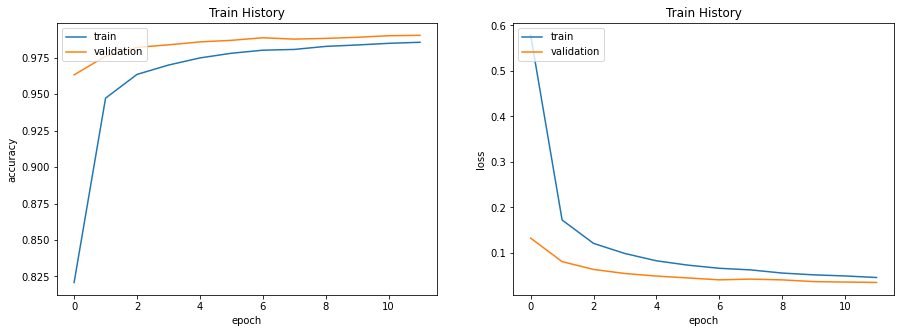

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(121); show_train_history(train_history, 'accuracy', 'val_accuracy')
plt.subplot(122); show_train_history(train_history, 'loss', 'val_loss')
plt.show()

In [68]:
scores = model.evaluate(x_test4D_normalize, y_test_onehot)
print('lose =', scores[0])
print('accuracy =', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.9912
lose = 0.027332449331879616
accuracy = 0.9911999702453613


In [69]:
model.save('model/mdl_20220321.h5')